In [1]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import time


# System size
L = 3

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L) 
    

Flow step  0
    Found minimum norm =  9.153503961621325  for s =  0.0998046875
Flow step output with generator type  single_commutator using string  ZZZ  gave for s =  0.0998046875   minimal norm  9.153503961621325
    Found minimum norm =  8.628066833406423  for s =  0.09824218750000001
Flow step output with generator type  single_commutator using string  ZZ1  gave for s =  0.09824218750000001   minimal norm  8.628066833406423
    Found minimum norm =  8.541442521616347  for s =  0.0498046875
Flow step output with generator type  single_commutator using string  Z1Z  gave for s =  0.0498046875   minimal norm  8.541442521616347
    Found minimum norm =  7.757272583135505  for s =  0.0998046875
Flow step output with generator type  single_commutator using string  Z11  gave for s =  0.0998046875   minimal norm  7.757272583135505
    Found minimum norm =  8.628066833406423  for s =  0.09824218750000001
Flow step output with generator type  single_commutator using string  1ZZ  gave for s =

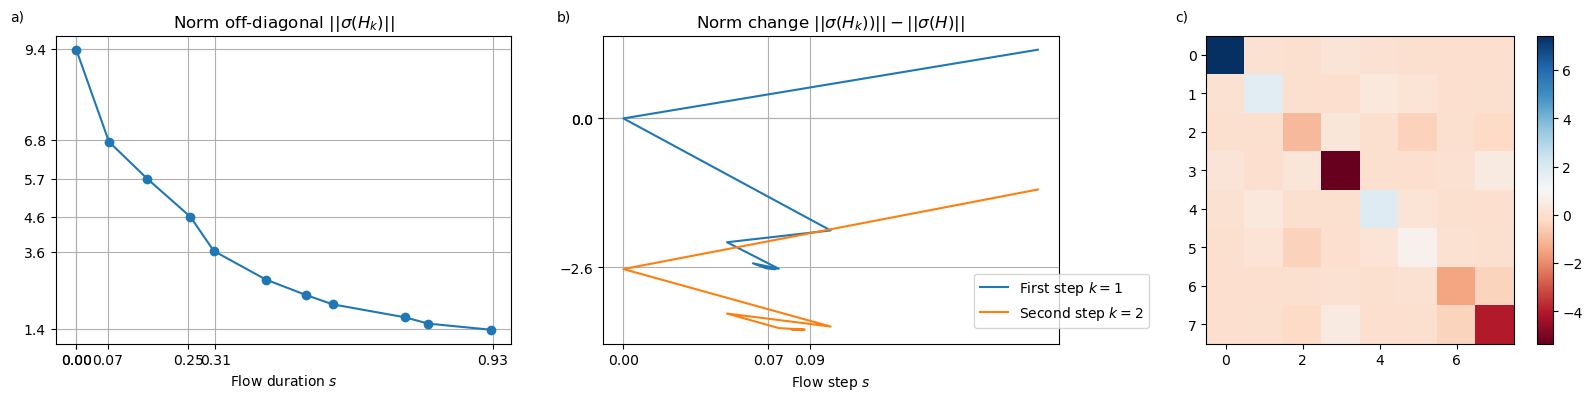

In [2]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TLFIM )

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.nmb_search_points_minimizing_s_search = 10
flow.flow_step_max = 0.2
flow.nmb_flow_steps = 10
flow.please_use_binary_search =  True
flow.please_compute_observables = False

# flow.flow_forwards( )
flow.flow_via_best_Z_search( please_also_check_canonical_bracket = True )

flow.show_flow_forwards_results()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/lib/python3/dist-packages/ipykernel_launcher.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/lib/python3/dist-packages/ipykernel_launcher.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator


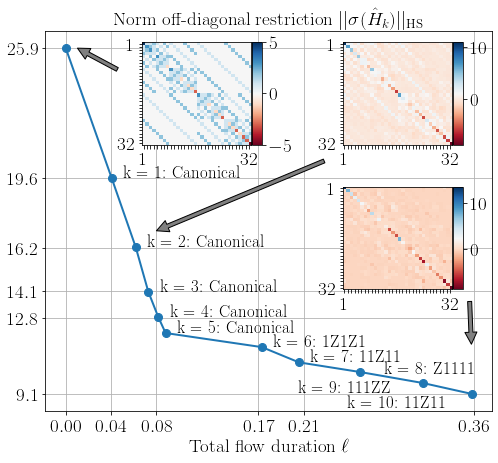

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_iteration_results(  ):
    flow.run_param_rc(fontsize=19)
    flow_results = flow.flow_outputs

    f=plt.figure(figsize = ( 8,7 ))
    n=1
    ax_a = f.add_subplot(1,n,1)
    norms = flow_results['minimal_norm_sigma_H_s']
    x_axis = [sum(flow_results['minimizing_flow_step'][:k])for k in range( 1, len(flow_results['minimizing_flow_step'])+1)]

    plt.plot( x_axis, norms, '-o')   
    N = 10
    k=0
    for xy in zip([x+.01 for x in x_axis[0:N]], 
                  [n - 0.03 for n in norms[0:N]]):  
        if k == 0 or k == 9 or k == 8:
            a=1
        else:
            plt.annotate('k = ' + str(k) + ': ' + flow_results['strs_of_minimizer_Z'][k-1], xy=xy, textcoords='data', fontsize=17)
        k=k+1
    
    plt.annotate('k = ' + str(k) + ': ' + flow_results['strs_of_minimizer_Z'][k-1], 
                 xy=(x_axis[-1]-.11,norms[-1]-.7), textcoords='data', fontsize=17)

    plt.annotate('k = ' + str(k-1) + ': ' + flow_results['strs_of_minimizer_Z'][k-2], 
                 xy=(x_axis[k-1]-.11,norms[k-1]-.5), textcoords='data', fontsize=17)
    plt.annotate('k = ' + str(k-2) + ': ' + flow_results['strs_of_minimizer_Z'][k-3], 
                 xy=(x_axis[k-2]+.021,norms[k-2]-.13), textcoords='data', fontsize=17)
    x_labels_rounded = [ round(x, 2 ) for x in x_axis ]
    x_labels_rounded = [0] + x_labels_rounded[1:9]  + [max(x_labels_rounded)]
    x_labels_rounded.pop(2)
    x_labels_rounded.pop(2)
    x_labels_rounded.pop(-2)
    x_labels_rounded.pop(3)
    
    plt.xticks(x_labels_rounded)
    y_labels_rounded = [ round(y, 1 ) for y in norms ]
    y_labels_rounded = y_labels_rounded[0:5] + [min(y_labels_rounded)]
    plt.yticks(y_labels_rounded)
    plt.grid()
    plt.xlabel(r'Total flow duration $\ell$')
    plt.title(r'Norm off-diagonal restriction $\vert\vert\sigma(\hat H_k)\vert\vert_\mathrm{HS}$')
    a =-.1
    b = 1.05
 
    axin1 = ax_a.inset_axes([0.2,.7, 0.31, 0.27])
    inset1 = axin1.imshow( H_TLFIM, cmap='RdBu' )
    divider1 = make_axes_locatable(axin1)
    div_ax = divider1.append_axes("right", size="10%", pad=0.05)
    cbar1 = plt.colorbar(inset1, cax = div_ax )
    range_plot = np.max( np.abs( H_TLFIM ) )
#     cbar1.set_clim( -range_plot, range_plot )
    axin1.set_yticks(range(2**L))  
    axin1.set_xticklabels([1]+['']*(2**L-2)+[2**L])
    axin1.set_yticklabels([1]+['']*(2**L-2)+[2**L])
    axin1.set_xticks(range(2**L))
    ax_a.annotate(' ',
            xy=(x_axis[0]+.01, norms[0]),  # theta, radius
            xytext=(0.24, 0.81),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='gray', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom')
#     axin1.set_xlabel(r'$j$')
#     axin1.set_title(r'$k$')
#     axin1.grid()
    axin2 = ax_a.inset_axes([0.65,.32, 0.31, 0.27])
    inset2 = axin2.imshow(flow_results['optimally_flowed_H'][-1], cmap='RdBu')

    divider2 = make_axes_locatable(axin2)
    div_ax2 = divider2.append_axes("right", size="10%", pad=0.05)
    cbar2 = plt.colorbar(inset2, cax = div_ax2 )
    ax_a.annotate(' ',
        xy=(x_axis[-1], 11.4),  # theta, radius
        xytext=(.95, .3),    # fraction, fraction
        textcoords='axes fraction',
        arrowprops=dict(facecolor='gray', shrink=0.05),
        horizontalalignment='left',
        verticalalignment='bottom')
    
    axin3 = ax_a.inset_axes([0.65,.7, 0.31, 0.27])
    inset3 = axin3.imshow(flow_results['optimally_flowed_H'][2], cmap='RdBu')

    divider3 = make_axes_locatable(axin3)
    div_ax3 = divider3.append_axes("right", size="10%", pad=0.05)
    cbar2 = plt.colorbar(inset3, cax = div_ax3 )
    ax_a.annotate(' ',
        xy=(x_axis[2]+.01, norms[2]+.6),  # theta, radius
        xytext=(0.65, 0.67),    # fraction, fraction
        textcoords='axes fraction',
        arrowprops=dict(facecolor='gray', shrink=0.05),
        horizontalalignment='left',
        verticalalignment='bottom')
    axin2.set_yticks(range(2**L))  
    axin2.set_xticklabels([1]+['']*(2**L-2)+[2**L])
    axin2.set_yticklabels([1]+['']*(2**L-2)+[2**L])
    axin2.set_xticks(range(2**L))    
    axin3.set_yticks(range(2**L))  
    axin3.set_xticklabels([1]+['']*(2**L-2)+[2**L])
    axin3.set_yticklabels([1]+['']*(2**L-2)+[2**L])
    axin3.set_xticks(range(2**L))
    chosen_steps = [1,2]
    plt.savefig( 'figs/mix_L_'+str(L)+'.pdf')
    
plot_iteration_results()

#### Some additional uses of the class

The stored observables are these:

In [4]:
flow.flow_outputs.keys()

dict_keys(['flow_generator_type', 'minimal_norms_sigma_H', 'minimizing_flow_step', 'cumulative_flow_parameters', 'flow_steps_grids_binary_search', 'norms_flow_generator_W', 'flowed_hamiltonians', 'flowed_hamiltonian', 'config', 'norm_H_for_optimal_Z', 'norms_H_for_different_Z', 'all_norms_computed_in_search', 'all_Z_names', 'str_of_minimizer_Z', 'optimally_flowed_H', 'minimal_norm_sigma_H_s', 's_grid', 'norms_sigma_H_s', 'strs_of_minimizer_Z', 'final_flowed_H'])

(some of these are empty)
The Hamiltonians are stored as optimally flowed in the sense that the flow step duration was optimized by a brute force grid search or local binary search.
The first element is the initial Hamiltonin so 

In [5]:

len(flow.flow_outputs['optimally_flowed_H'])

11

we get 1 + nmb of steps

#### Simple plot for debugging

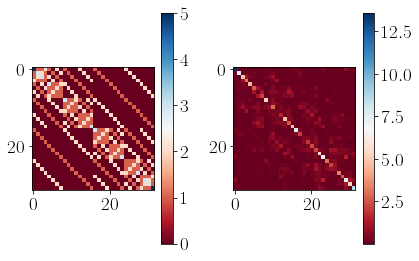

In [6]:
H = flow.flow_outputs['final_flowed_H'][-1]

plt.figure()
plt.subplot(121)
plt.imshow(abs(H_TLFIM), cmap='RdBu')
plt.colorbar()
plt.subplot(122)
plt.imshow(abs(H), cmap='RdBu')
plt.colorbar()
plt.tight_layout()

This variable stores or strings that have been tested in each step

In [7]:
print(flow.flow_outputs['all_Z_names'])

['ZZZZZ', 'ZZZZ1', 'ZZZ1Z', 'ZZZ11', 'ZZ1ZZ', 'ZZ1Z1', 'ZZ11Z', 'ZZ111', 'Z1ZZZ', 'Z1ZZ1', 'Z1Z1Z', 'Z1Z11', 'Z11ZZ', 'Z11Z1', 'Z111Z', 'Z1111', '1ZZZZ', '1ZZZ1', '1ZZ1Z', '1ZZ11', '1Z1ZZ', '1Z1Z1', '1Z11Z', '1Z111', '11ZZZ', '11ZZ1', '11Z1Z', '11Z11', '111ZZ', '111Z1', '1111Z', '11111']


and these are the strings that gave the optimal generator to decrease the norm of the off-diagonal restriction

In [8]:
flow.flow_outputs['strs_of_minimizer_Z']

['Canonical',
 'Canonical',
 'Canonical',
 'Canonical',
 'Canonical',
 '1Z1Z1',
 '11Z11',
 'Z1111',
 '111ZZ',
 '11Z11']